In [1]:
import numpy as np
import pylab as pl
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'
# pl.style.use('classic')
# pl.style.available

In [2]:
ntries = 1

# UNITS METAL

#### mass = Kg/mole
#### distance = Angstroms
#### time = picoseconds
#### energy = eV
#### velocity = Angstroms/picosecond
#### force = eV/Angstrom
#### torque = eV
#### temperature = Kelvin
#### pressure = bars
#### dynamic viscosity = Poise
#### charge = multiple of electron charge (1.0 is a proton)
#### dipole = charge*Angstroms
#### electric field = volts/Angstrom
#### density = gram/cm^dim

## $$V_{morse} = D\left(e^{-2a\left(r_{ij} - R\right)} - 2 e^{-a\left(r_{ij} - R\right)}\right)$$

In [3]:
def V_morse(D, R_morse, a, rij):
    
    rij = abs(rij)
    
    return D * (np.exp(- 2 * a * (rij - R_morse)) - 2 * np.exp(- a * (rij - R_morse)))
    

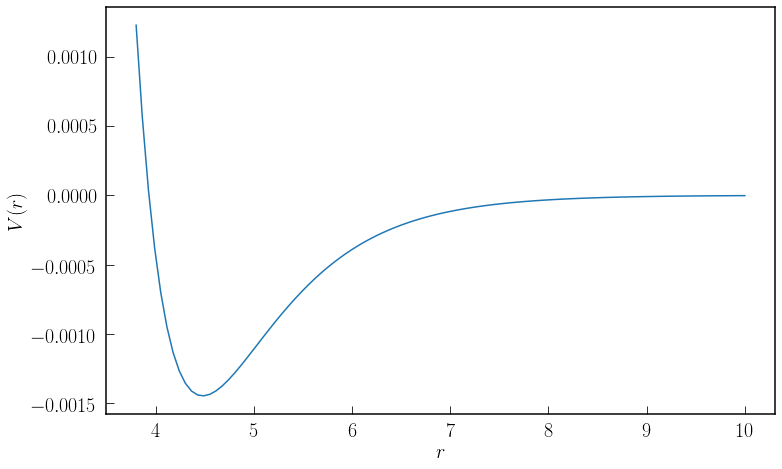

In [4]:
rj = np.zeros(100, dtype= np.double)

rj.dtype

ri = np.linspace(3.8 , 10, 100, dtype= np.double)

rij = np.abs(ri - rj)

pl.plot(rij, V_morse(1.447e-3, 4.478, 1.266, rij))
pl.ylabel(r'$V(r)$')
pl.xlabel(r'$r$')
pl.show()
pl.clf()

In [5]:
# Morse Potential params
# eV, A, none
D, R_morse, a = 1.447 * 1e-3, 4.478, 1.266

## $$F_{ij,morse} = 2aD\left(e^{-2a\left(r_{ij} - R\right)} - e^{-a\left(r_{ij} - R\right)}\right)\frac{ri - rj}{|ri - rj|}$$

In [6]:
def compute_force(D, R_morse, a, ri,  rj):
    rij = np.abs(ri - rj)
    
    fij = 2 * a * D * (np.exp(- 2 * a * (rij - R_morse)) - np.exp(- a * (rij - R_morse))) * np.sign(ri - rj)
    fji = -fij

    if (rij > 10):
        return 0 * fij, 0 * fji
    else:
        return fij, fji

## $$\mathrm{Change\;parameters\;here}$$

In [7]:
# Helium atomic mass
m_gas = 4.002602 * 1e-3
T_gas = 300

In [8]:
# Aluminum atomic mass in Kg
m_surf = 26.981539 * 1e-3
T_surf = 300 

In [9]:
def sigma(m, T):
    R = 8.314
    # in A/ps
    return 1e-2 * np.sqrt(R * T / m)

In [10]:
z_gas_zero = 25.0
v_gas_half = np.array([-6.7227230806536227])#-np.abs(np.random.normal(loc = 0.0, scale = sigma(m_gas, T_gas), size = ntries))

## $$A = \sqrt{\frac{2KT}{m\omega^{2}}} = \frac{1}{\pi f_{k}}\sqrt{\frac{KT}{2m}} = \frac{1}{\sqrt{2}\pi f_{k}}\sigma_{surface}$$

In [11]:
# Frequency in per picosecond
freq_k = 4.063#4.063
omega = 2 * np.pi * freq_k

In [12]:
A_surf = (1 / (np.sqrt(2) * np.pi * freq_k)) * sigma(m_surf, T_surf)
k = m_surf * omega**2

# Converting k to eV/A^2
k = k * (1/9.6485)

In [13]:
phi = np.array([np.pi/2])#np.random.rand(ntries).astype(np.double) * 2 * np.pi

In [14]:
# z_surf_zero = A_surf * np.sin(phi)
# v_surf_half = A_surf * omega * np.cos(phi)
z_surf_zero = np.array([0.02891713939339937])#A_surf * np.sin(phi)
v_surf_half = np.array([4.2359458715391405])#A_surf * omega * np.cos(phi)

## $$\mathrm{All\;done}$$

### Time in Picoseconds

In [15]:
t_start = 0
t_end = 30
dt = 0.001

In [16]:
time       = np.arange(    t_start,\
                           t_end + dt,\
                           dt,\
                           dtype = np.double\
                      )

In [17]:
z_gas_all = np.zeros(len(time) + 1, dtype = np.double)

v_gas_all = np.zeros(len(time) + 1, dtype = np.double)

z_gas_all[0] = z_gas_zero
v_gas_all[0] = v_gas_half

In [18]:
z_gas_all.dtype

dtype('float64')

In [19]:
z_surf_all = np.zeros(len(time) + 1, dtype = np.double)

v_surf_all = np.zeros(len(time) + 1, dtype = np.double)

f_n_surf_all = np.zeros(len(time), dtype = np.double)
f_n_gas_all = np.zeros(len(time), dtype = np.double)


z_surf_all[0] = z_surf_zero
v_surf_all[0] = v_surf_half

### $$\mathrm{1Kg \rightarrow \frac{eV}{A^{o} \;Kg} = 10^{-4}e\frac{A^{o}}{ps^{2}}}$$
### $$\mathrm{\frac{1Kg}{N_{A}} \rightarrow 10^{-4}e \times N_{A} \frac{A^{o}}{ps^{2}}}$$

In [20]:
def leapfrog(m, v_n_plus_half, f_n_plus_one, dt):
    
    
    # Converting acceleration from eV/A(Kg) to A/ps^2
    a_current = (f_n_plus_one/m) * 9.6485
    
    v_updated = v_n_plus_half + a_current * dt
    
    return v_updated

# $$\mathrm{NVE\;integration}$$

In [21]:

for i in range(len(time)):
    
    f_n_gas, f_n_surf = compute_force(D, R_morse, a,  z_gas_all[i], z_surf_all[i])
    
    f_n_surf += -k* z_surf_all[i] 
    
    f_n_surf_all[i] = f_n_surf
    f_n_gas_all[i]  = f_n_gas
    

    
    z_gas_all[i + 1] = z_gas_all[i] + v_gas_all[i] * dt
    z_surf_all[i + 1] = z_surf_all[i] + v_surf_all[i] * dt
    
    
    f_n_plus_one_gas, f_n_plus_one_surf = compute_force(D, R_morse, a,  z_gas_all[i + 1], z_surf_all[i + 1])
    
    f_n_plus_one_surf += -k* z_surf_all[i + 1] 
    
    
    v_gas_all[i + 1] = leapfrog(m_gas, v_gas_all[i], f_n_plus_one_gas, dt)
    
    v_surf_all[i + 1] = leapfrog(m_surf, v_surf_all[i], f_n_plus_one_surf, dt)

    
    
    

# $$\mathrm{Post\;Processing}$$

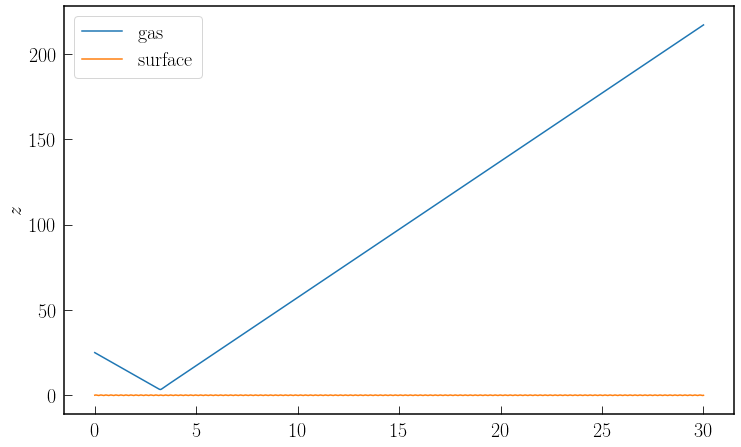

In [22]:
pl.plot(time, z_gas_all[1:], label= 'gas')
pl.plot(time, z_surf_all[1:], label= 'surface')
pl.ylabel('$z$')
pl.legend()
pl.show()
pl.clf()

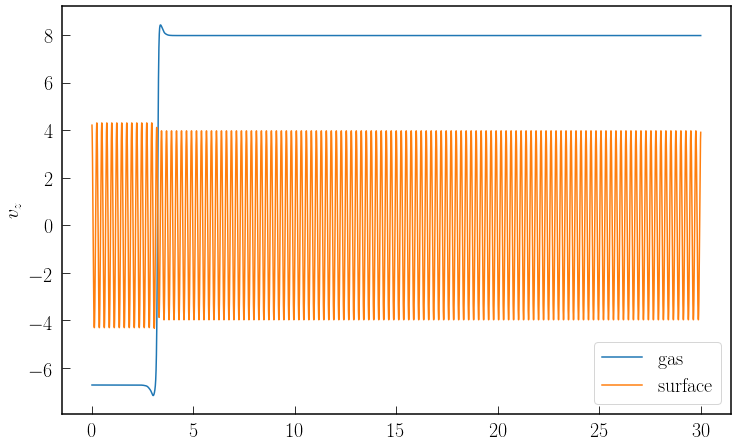

In [23]:
pl.plot(time, v_gas_all[1:], label= 'gas')
pl.plot(time, v_surf_all[1:], label= 'surface')
pl.ylabel('$v_{z}$')
pl.legend()
pl.show()
pl.clf()

In [24]:
# IN eV
KE = (0.5 * m_surf * v_surf_all**2 + 0.5 * m_gas * v_gas_all**2) * (1/9.6485)
PE = V_morse(D, R_morse, a, ( z_surf_all - z_gas_all )) + (0.5 * k * z_surf_all**2) 

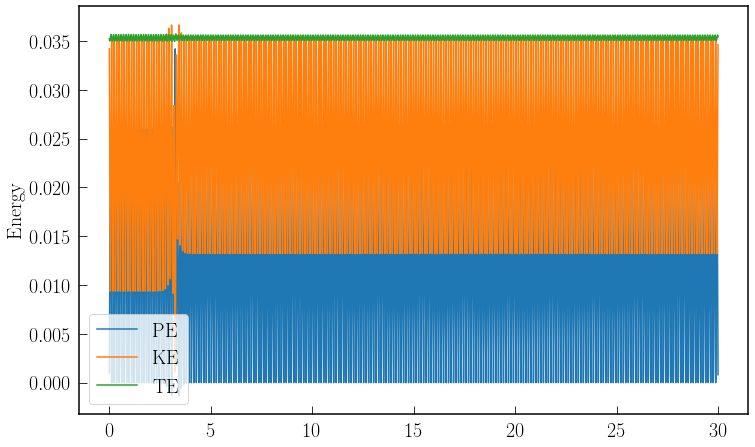

In [25]:
pl.plot(time,(PE)[1:], label= 'PE')
pl.plot(time,(KE)[1:], label= 'KE')
pl.plot(time,(KE + PE)[1:], label= 'TE')

pl.ylabel('$\mathrm{Energy}$')
pl.legend()
pl.show()
pl.clf()

In [26]:
import pandas
df = pandas.read_table("test_print"+".txt", delim_whitespace=True, comment='#')

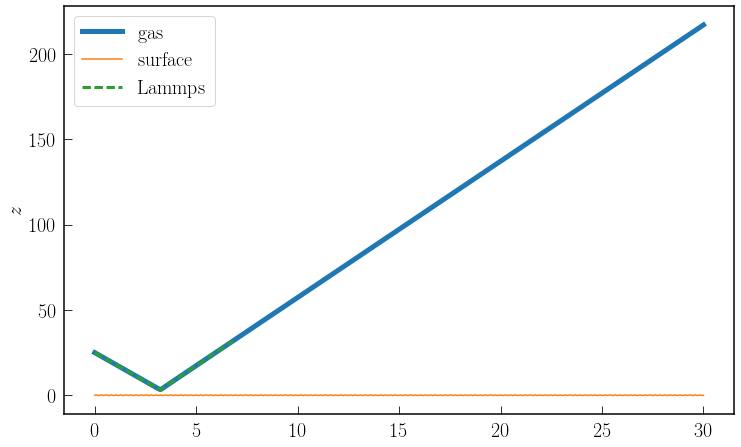

In [27]:
pl.plot(time, z_gas_all[1:],lw = 5, label= 'gas')
pl.plot(time, z_surf_all[1:], label= 'surface')
pl.plot(df.step * 0.001, df.v_helium_pos_z,'--', lw =3, label = 'Lammps')
pl.ylabel('$z$')
pl.legend()
pl.show()
pl.clf()

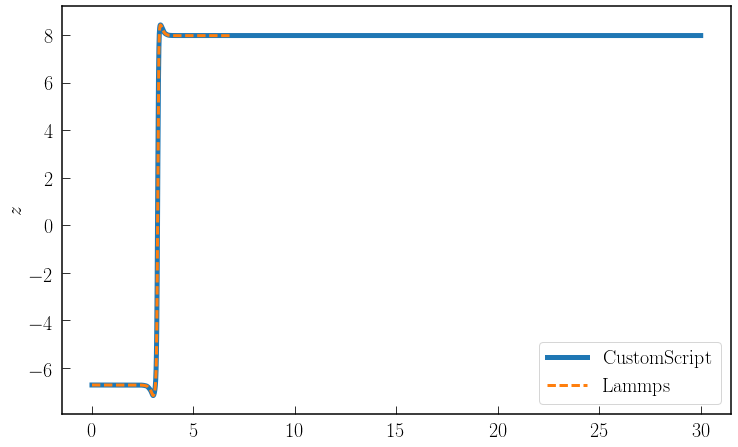

In [28]:
pl.plot(time, v_gas_all[1:], lw= 5, label = 'CustomScript')
pl.plot(df.step * 0.001, df.v_helium_vel_z,'--', lw = 3, label = 'Lammps')
pl.ylabel('$z$')
pl.legend()
pl.show()
pl.clf()

In [29]:
k

1.8224696219102285

In [30]:
z_surf_all[0]

0.02891713939339937

In [31]:
v_gas_all[-1]

7.9870758347897715

In [32]:
v_gas_all[0]

-6.7227230806536227